In [1]:
import pandas as pd # Linear algebra
import numpy as np # Data processing
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Basic plotting
import sklearn as sk # Machine learning
import xgboost as xgb # Gradient boosting tree models

training = pd.read_csv("C:/Users/mihal/OneDrive/Υπολογιστής/Titanic/train.csv")
test = pd.read_csv("C:/Users/mihal/OneDrive/Υπολογιστής/Titanic/test.csv")
print(training.shape) # Dimensions check regarding the training data
training.head(5) # View the first 5 observations of the training data

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
training['train_test']=1
test['train_test']=0
test['Survived']=np.NaN
all_data=pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
training.info() # Quick look at our data types and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
training.describe() # Better understanding of the numeric data in order to view the tendencies

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
training.describe().columns # Quick way to seperate the numeric columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [6]:
# Look at numerical and categorical values separately
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

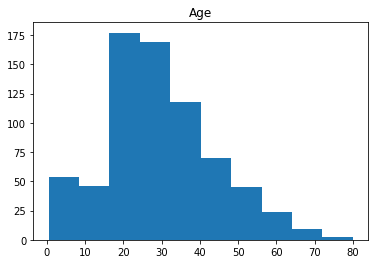

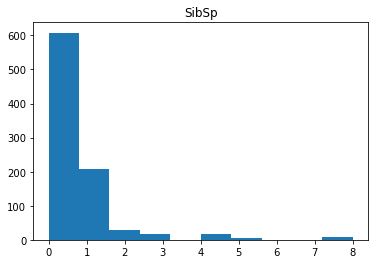

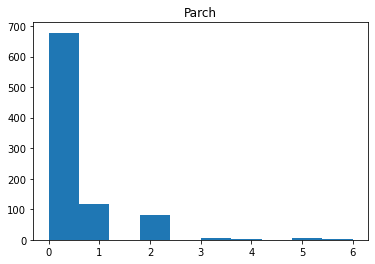

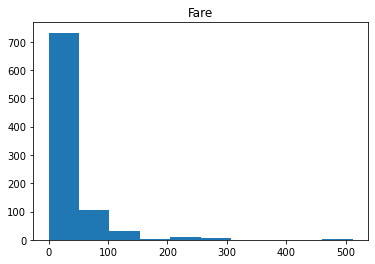

In [7]:
# Distributions for all numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
# Age seems to follow a nearly normal distribution, the other ones are gonna need to be normalized as they're (right) skewed

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

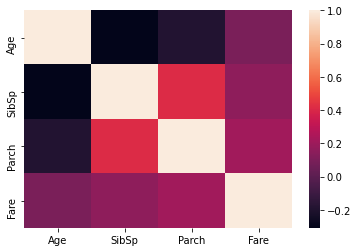

In [8]:
# let's take a look at the correlations
print(df_num.corr())
sns.heatmap(df_num.corr())
# If we use regression this is gonna be really important because we seek to avoid multicollinearity issues!

In [9]:
# Let's compare the survival rate across Age, SibSp, Parch, Fare
pd.pivot_table(training, index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


C:\Users\mihal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


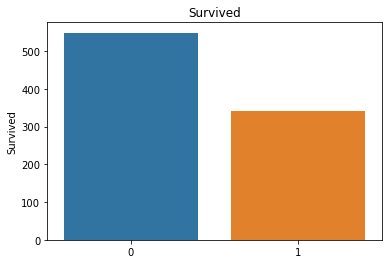

C:\Users\mihal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


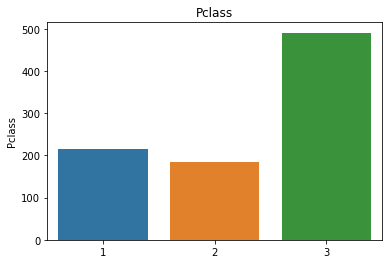

C:\Users\mihal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


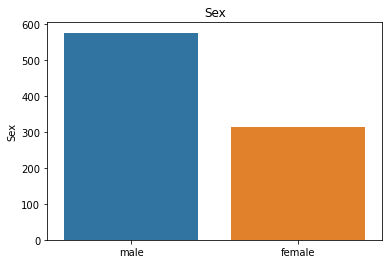

C:\Users\mihal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


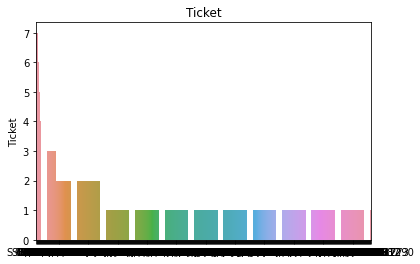

C:\Users\mihal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


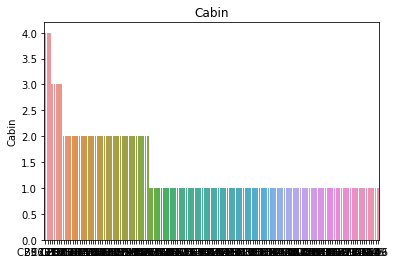

C:\Users\mihal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


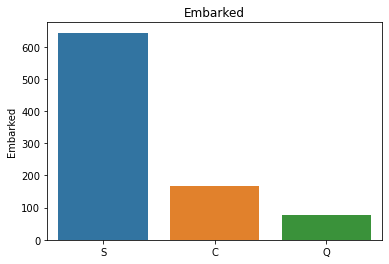

In [10]:
# Let's take a look at our categorical values now
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()
# 0 means people didn't survive , 1 means people survived

In [11]:
# Comparing the dependant variable "Survival" with each of these categorical variables
print(pd.pivot_table(training, index = "Survived", columns = "Pclass", values = "Ticket",aggfunc = "count"))
print()
print(pd.pivot_table(training, index = "Survived", columns = "Sex", values = "Ticket", aggfunc = "count"))
print()
print(pd.pivot_table(training, index = "Survived", columns = "Embarked", values = "Ticket", aggfunc = "count"))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [12]:
# Feature Engineering
# 1) Cabin - Simplify cabins (evaluated if cabin letter or the purchase of tickets across multiple cabins impacted survival)
# 2) Tickets - Do different ticket types impact surival rates?
# 3) Does a person's title relate somehow to survival rates?

df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()
# 687 people (the vast majority of them) had no multiple cabins

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [13]:
print(pd.pivot_table(training, index="Survived",columns = "cabin_multiple", values="Ticket", aggfunc ="count"))
print()
# Survival rate across the people with multiple cabins

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0



In [14]:
# Create categories based on the cabin letter (n stands for na)
# In this case we will treat null values as a different category
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [15]:
# Comparing survival rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training, index="Survived", columns="cabin_adv", values = "Name", aggfunc="count")
# We treat the na value as a categorical.We can use it as a feature and it might tell us something additional, 
# it's worth experimenting.
# Column letter as a categorical variable

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [16]:
# Understanding ticket values better (some had letters, some had just numbers), was worth experimenting anyway
# Numeric vs Non-Numeric
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [17]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [18]:
# Let's view all of the dataframe's rows
pd.set_option('max_rows',None)
training['ticket_letters'].value_counts()
# Exploration of all the different lettering conventions
# Nothing too common spotted
# More data would come in handy but it still was worth a shot

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
pp             3
wep            3
scah           2
sotono2        2
swpp           2
ppp            2
sca4           1
casoton        1
scahbasle      1
sc             1
as             1
fc             1
sop            1
scow           1
fa             1
sp             1
Name: ticket_letters, dtype: int64

In [19]:
# Difference in numeric vs non-numeric tickets regarding the survival rate
pd.pivot_table(training, index = "Survived", columns = "numeric_ticket", values = "Ticket", aggfunc= "count")
# Pretty similar ratios, no impact detected 

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [20]:
# Survival rate across different ticket types
pd.pivot_table(training, index = "Survived", columns = "ticket_letters", values = "Ticket", aggfunc = "count")
# No impact detected yet again, maybe if we had more data there could be something to gather

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [21]:
# Feature engineering on person's title
training.Name.head(10)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Mr , misss, mrs, master , etc
# Maybe royal people would have a higher chance of surviving

In [22]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Mme               1
Sir               1
Don               1
Capt              1
Lady              1
Ms                1
the Countess      1
Jonkheer          1
Name: name_title, dtype: int64

In [23]:
# Data preprocessing for model
# 1) Drop null values from embarked (only 2).
# 2) Include only relevant variables ( since we have limited data we want to exclude attributes like name or passenger ID, so that 
# we have a reasonable amount of features for our models to deal with ).
# 3) Do categorical transforms on all data. 
# 4) Impute data with mean for fare and age.
# 5) Normalize fare using the logarithm in order to make it look more as a gaussian distribution.
# 6) Scale data.

# Create all categorical variables that we did before for both training and test sets
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace ('.','').replace('/','').lower() 
if len(x.split(' ')[:-1]) > 0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

<AxesSubplot:>

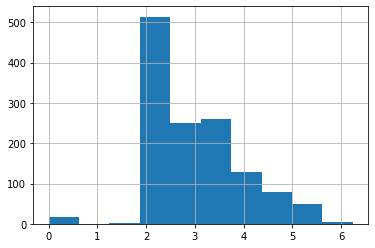

In [24]:
# Impute nulls for continuous data
all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median()) # The median is preffered due to the fact that Fare was not normally distributed

# Drop nulls in the "Embarked" rows
all_data.dropna(subset = ['Embarked'], inplace = True)

# Normalizing the "Fare"
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [25]:
# Convert Fare to categorical value in order to use pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

# Create dummy variables for all categories
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked',
'cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

# Splitting to train and test set
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'],axis = 1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'],axis = 1)
Y_train = all_data[all_data.train_test == 1].Survived # Dependant variable
Y_train.shape

(889,)

In [26]:
# Scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled [['Age','SibSp','Parch','norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis = 1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis = 1)
Y_train = all_data[all_data.train_test == 1].Survived

In [27]:
# Model building (baseline validation performance) using 5 fold Cross validation which is a resampling procedure used to evaluate 
# machine learning models on a limited data sample.
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [28]:
# Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [29]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [30]:
# Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75280899 0.81920904]
0.7739541674601662


In [31]:
# KNN
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.80337079 0.85310734]
0.8155652891512728


In [32]:
# Random Forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.81460674 0.78651685 0.85393258 0.73033708 0.84180791]
0.8054402336062972


In [33]:
# SVC
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


In [34]:
# Extreme Gradient Boosting
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
xgb = XGBClassifier(random_state = 1,use_label_encoder=False , eval_metric = "logloss")
cv = cross_val_score(xgb, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.84831461 0.78651685 0.81920904]
0.8177743921792675


In [35]:
# Voting Classifier
# A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) 
# based on their highest probability of chosen class as the output.
# It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the
# highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them,
# we create a single model which trains by these models and predicts output based on their combined majority of voting for each
# output class.

# Voting Classifier supports two types of votings:
# Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had
# the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output
# class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
# Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. 
# Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and 
# B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had 
# the highest probability averaged by each classifier.

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)],voting ='soft')
cv = cross_val_score(voting_clf, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.83146067 0.81460674 0.83146067 0.80337079 0.85875706]
0.8279311877102774


In [36]:
# Hard voting
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)],voting ='hard')
cv = cross_val_score(voting_clf, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.84269663 0.81460674 0.84831461 0.79775281 0.84745763]
0.8301656827270996


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [38]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
             'penalty' : ['l1','l2'],
             'C' : np.logspace(-4,4,20),
             'solver' : ['liblinear']}
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled, Y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8268075922046594
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [39]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled, Y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8301720307243065
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [40]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                 'C': [.1,1,10,10,1000]},
                                 {'kernel': ['linear'], 'C': [.1,1,10,100,1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5],
                                 'C': [.1,1,10,100,1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled, Y_train)
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8324319177299563
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [41]:
rf = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [400,450,500,550],
             'criterion' : ['gini','entropy'],
             'bootstrap' : [True],
             'max_depth' : [15,20,25],
             'max_features' : ['auto','sqrt',10],
             'min_samples_leaf' : [2,3],
             'min_samples_split' : [2,3]}
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled, Y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8358027042468101
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


<AxesSubplot:>

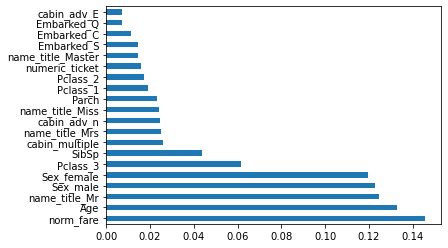

In [42]:
# Importance of various features
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled, Y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index = X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [43]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_

voting_clf_hard = VotingClassifier(estimators =
[('knn',best_knn),('rf',best_rf),('svc',best_svc)],voting = 'hard')
voting_clf_soft = VotingClassifier(estimators =
[('knn',best_knn),('rf',best_rf),('svc',best_svc)],voting = 'soft')
voting_clf_all_soft = VotingClassifier(estimators =
[('knn',best_knn),('rf',best_rf),('svc',best_svc),('lr',best_lr)],voting = 'soft')
voting_clf_all_hard = VotingClassifier(estimators =
[('knn',best_knn),('rf',best_rf),('svc',best_svc),('lr',best_lr)],voting = 'hard')

print('voting_clf_hard :' , cross_val_score(voting_clf_hard,X_train,Y_train,cv=5))
print('voting_clf_hard_mean :' , cross_val_score(voting_clf_hard,X_train,Y_train,cv=5).mean())

print('voting_clf_soft :' , cross_val_score(voting_clf_soft,X_train,Y_train,cv=5))
print('voting_clf_soft_mean :' , cross_val_score(voting_clf_soft,X_train,Y_train,cv=5).mean())

print('voting_clf_all_soft :' , cross_val_score(voting_clf_all_soft,X_train,Y_train,cv=5))
print('voting_clf_all_soft_mean :' , cross_val_score(voting_clf_all_soft,X_train,Y_train,cv=5).mean())

print('voting_clf_all_hard :' , cross_val_score(voting_clf_all_hard,X_train,Y_train,cv=5))
print('voting_clf_all_hard_mean :' , cross_val_score(voting_clf_all_hard,X_train,Y_train,cv=5).mean())

voting_clf_hard : [0.79213483 0.81460674 0.8258427  0.80898876 0.83615819]
voting_clf_hard_mean : 0.8155462451596522
voting_clf_soft : [0.78089888 0.83146067 0.8258427  0.80898876 0.86440678]
voting_clf_soft_mean : 0.8234431536850124
voting_clf_all_soft : [0.80898876 0.83146067 0.8258427  0.81460674 0.86440678]
voting_clf_all_soft_mean : 0.8290611312131023
voting_clf_all_hard : [0.80337079 0.80898876 0.83146067 0.82022472 0.84180791]
voting_clf_all_hard_mean : 0.8211705706849488


In [44]:
# Make predictions
voting_clf_hard.fit(X_train_scaled,Y_train)
voting_clf_soft.fit(X_train_scaled,Y_train)
voting_clf_all_soft.fit(X_train_scaled,Y_train)
voting_clf_all_hard.fit(X_train_scaled,Y_train)

best_rf.fit(X_train_scaled,Y_train)
best_svc.fit(X_train_scaled,Y_train)
Y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled)
Y_hat_rf = best_rf.predict(X_test_scaled)
Y_hat_svc = best_svc.predict(X_test_scaled)
Y_hat_vc_soft = voting_clf_soft.predict(X_test_scaled)
Y_hat_vc_all_soft = voting_clf_all_soft.predict(X_test_scaled)
Y_hat_vc_all_hard = voting_clf_all_hard.predict(X_test_scaled)

In [55]:
# Convert output to dataframe
final_data = {'PassengerId': test.PassengerId, 'Survived': Y_hat_svc}
submission = pd.DataFrame(data = final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': Y_hat_vc_soft}
submission_2 = pd.DataFrame(data = final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': Y_hat_vc_all_soft}
submission_3 = pd.DataFrame(data = final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': Y_hat_rf}
submission_4 = pd.DataFrame(data = final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': Y_hat_vc_all_hard}
submission_5 = pd.DataFrame(data = final_data_5)

In [56]:
# Prepare submission files
submission.to_csv('C:/Users/mihal/OneDrive/Υπολογιστής/Titanic/submission_svc.csv', index = False)

submission.to_csv('C:/Users/mihal/OneDrive/Υπολογιστής/Titanic/submission_2.csv', index = False)

submission.to_csv('C:/Users/mihal/OneDrive/Υπολογιστής/Titanic/submission_3.csv', index = False)

submission.to_csv('C:/Users/mihal/OneDrive/Υπολογιστής/Titanic/submission_4.csv', index = False)

submission.to_csv('C:/Users/mihal/OneDrive/Υπολογιστής/Titanic/submission_5.csv', index = False)